In [2]:
# loading the test, train and gender_submission data
train <- read.csv("Titanic_Train.csv")
test <- read.csv("Titanic_Test.csv")
gender <- read.csv("gender_submission.csv")

In [3]:
# Binding the Survived variable of gender dataset with test dataset
library(dplyr)
test <- bind_cols(test, Survived=gender$Survived)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Data Exploration

In [4]:
dim(train)
dim(test)

[1] 891  12

[1] 418  12

In [5]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [6]:
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


* Name, Ticket, Cabin contain qualitative data with lot of unique values. So it won't be a part of our analysis
* Age has missing values which we'll impute by mean
* Sex and Embarked are categorical variables for which we'll create dummy variables

In [7]:
summary(test)

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

* Fare has 1 missing value which we'll impute by mode
* Remaining, same exploration points as training data

# Data Preprocessing

In [8]:
library(fastDummies)
train <- dummy_cols(train, select_column="Sex")
test <- dummy_cols(test, select_column="Sex")

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



In [9]:
# Creating dummy variables for embarked variable and removing rows having missing values
train <- train[-830,] 
train <- train[-62,]
train <- dummy_cols(train, select_column="Embarked")
test <- dummy_cols(test, select_column="Embarked")

In [10]:
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0,1,0,0,1
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0,1,0,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,1,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0,1,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,1,0,0,0,1


In [11]:
test

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0,0,1,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1,1,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0,0,1,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0,0,1,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1,1,0,0,0,1
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0,0,1,0,0,1
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q,1,1,0,0,1,0
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S,0,0,1,0,0,1
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C,1,1,0,1,0,0


In [12]:
# Keeping only necessary variables
which(colnames(test) == "Survived")
train <- select(train, c(1,2,3,6,7,8,10,14,16,17))
test <- select(test, c(1,2,5,6,7,9,12,14,16,17))

[1] 12

In [13]:
dim(train)
dim(test)

[1] 889  10

[1] 418  10

### Missing value imputation

In [14]:
train$Age[is.na(train$Age)] <- median(train$Age, na.rm=TRUE)
test$Age[is.na(test$Age)] <- median(test$Age, na.rm=TRUE)
test$Fare[is.na(test$Fare)] <- median(test$Fare, na.rm=TRUE)

# Logistic Regression

In [15]:
train.fit <- glm(Survived~. -PassengerId, data=train, family=binomial)
test.probs <- predict(train.fit, test, type='response')
test.pred <- rep('NO', 418) # no of variables in test set
test.pred[(test.probs > .5)] = 'YES'
table(test.pred, test$Survived)

         
test.pred   0   1
      NO  248   9
      YES  18 143

In [16]:
391/418

[1] 0.9354067

# Linear Discriminant Analysis

In [17]:
library(MASS)
trainLDA <- lda(Survived~. -PassengerId, data=train)
test.predict <- predict(trainLDA, test)
test.predict$posterior
test.class <- test.predict$class
table(test.class, test$Survived)


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




,0,1
1,0.93372834,0.06627166
2,0.58280360,0.41719640
3,0.92835055,0.07164945
4,0.93996853,0.06003147
5,0.35645492,0.64354508
6,0.90194594,0.09805406
7,0.25647076,0.74352924
8,0.86557423,0.13442577
9,0.16955627,0.83044373
10,0.95497040,0.04502960


          
test.class   0   1
         0 257   6
         1   9 146

In [18]:
403/418

[1] 0.9641148

# K nearest neighbour

In [19]:
require("class")
trainX <- train[,-2] # train all variables except dependent
testX <- test[,-7]
trainY <- train$Survived
testY <- test$Survived

trainX_s <- scale(trainX)
testX_s <- scale(testX)
set.seed(0)

Loading required package: class



By thumb rule, optimum value of k is sqrt(dim(train)). Hence, k=30

In [20]:
# k=3
knn.pred <- knn(trainX_s, testX_s, trainY, k=3)
table(knn.pred,testY)

        testY
knn.pred   0   1
       0 234  32
       1  32 120

In [21]:
354/418

[1] 0.84689

In [22]:
# k=5
knn.pred <- knn(trainX_s, testX_s, trainY, k=5)
table(knn.pred,testY)

        testY
knn.pred   0   1
       0 239  29
       1  27 123

In [23]:
362/418

[1] 0.8660287

In [24]:
# k=30
knn.pred <- knn(trainX_s, testX_s, trainY, k=30)
table(knn.pred,testY)

        testY
knn.pred   0   1
       0 252  15
       1  14 137

In [25]:
389/418

[1] 0.930622

We'll consider the accuracy obtained from k=30 as the optimum accuracy for this model

# Decision Tree

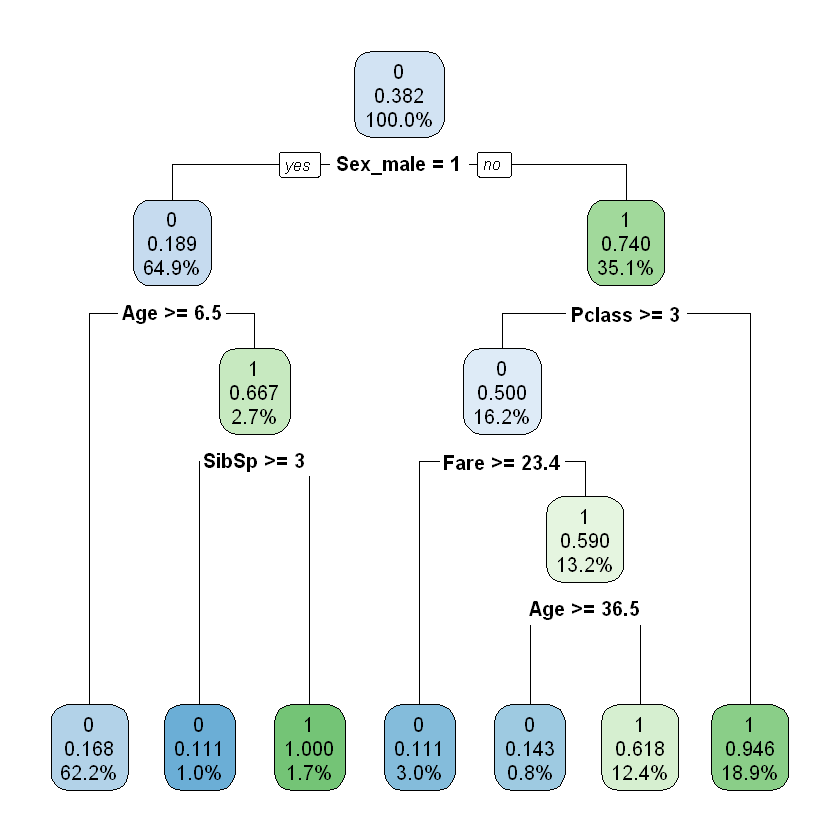

In [26]:
library(rpart)
library(rpart.plot)
classtree <- rpart(Survived~. -PassengerId, data=train, method="class", control=rpart.control(maxdepth = 4))
rpart.plot(classtree, digits=-3)

In [27]:
# Predicting values on test set
test$decision <- predict(classtree, test, type="class")
table(test$Survived, test$decision)

   
      0   1
  0 260   6
  1  12 140

In [28]:
400/418

[1] 0.9569378

# Bagging

In [29]:
library(randomForest)
train$Survived <- as.factor(train$Survived)
bagging <- randomForest(Survived~. -PassengerId, method="class", data=train, mtry=8)
test$bagging <- predict(bagging, test, type="response")
table(test$Survived, test$bagging)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




   
      0   1
  0 230  36
  1  34 118

In [30]:
348/418

[1] 0.8325359

# Random Forest

In [31]:
randomforest <- randomForest(Survived~. -PassengerId, data=train, ntree=500)
test$randomforest <- predict(randomforest, test, type="class")
table(test$Survived, test$randomforest)

   
      0   1
  0 254  12
  1  35 117

In [32]:
371/418

[1] 0.8875598

# Adaptive Boost

In [33]:
library(adabag)
adaboost <- boosting(Survived~. -PassengerId, data=train, boos=TRUE)
predada <- predict(adaboost, test)
table(predada$class, test$Survived)

Loading required package: caret

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



   
      0   1
  0 222  32
  1  44 120

In [34]:
342/418

[1] 0.8181818

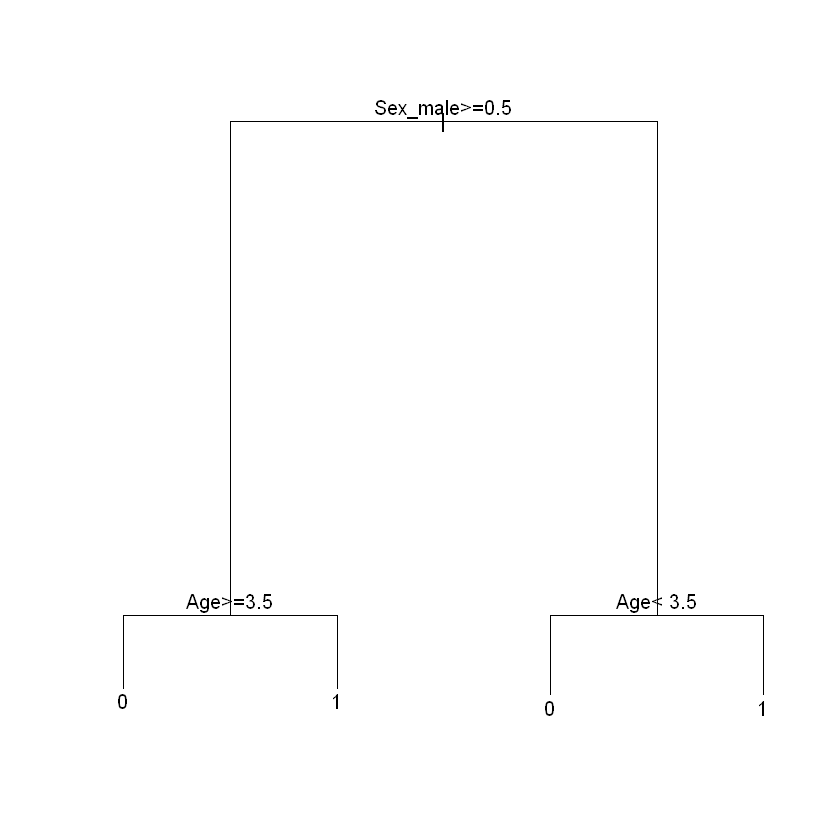

In [35]:
t1 <- adaboost$trees[[5]]
plot(t1)
text(t1, pretty=100)

# Gradient Boost

In [36]:
library(gbm)
set.seed(0)
test$Survived <- as.factor(test$Survived)
boosting <- gbm(Survived~.-1, data=train, distribution="multinomial", n.trees=1000, interaction.depth=4, shrinkage=0.2, verbose = F)
test$pregrad <- predict(boosting, test, n.trees=1000, type="response")
class_names = colnames(test$pregrad)[apply(test$pregrad, 1, which.max)]
table(test$Survived, as.factor(class_names))

Loaded gbm 2.1.8.1

Warning message:
"Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk."


   
      0   1
  0 210  56
  1  34 118

In [37]:
328/418

[1] 0.784689

In [38]:
which(colnames(train) == "Survived")
which(colnames(test) == "Survived")

[1] 2

[1] 7

# Support Vector Machines

### 1. Linear Kernel

In [39]:
library(e1071)
svmfit = svm (Survived~. -PassengerId, data=train , kernel = "linear", cost =1 ,scale = TRUE) 
## To check the support vectors
svmfit$index

[1]   7  15  19  25  28  31  34  35  39  41  42  50  61  62  64  71  72  83
 [19]  94  96 100 102 110 111 113 114 118 119 124 132 134 135 138 139 140 143
 [37] 144 147 163 167 168 169 170 174 177 180 181 185 191 199 203 205 228 229
 [55] 234 235 238 240 246 251 252 254 263 264 270 273 276 282 284 292 293 295
 [73] 296 297 302 312 326 331 332 336 339 343 351 357 362 372 373 374 377 378
 [91] 385 396 398 402 404 409 415 419 421 423 433 436 438 452 456 462 467 474
[109] 475 485 487 493 495 498 500 501 502 503 505 508 515 517 527 534 536 541
[127] 542 544 545 551 555 557 564 567 574 575 578 583 584 593 602 610 617 624
[145] 625 626 633 634 638 642 654 657 658 659 666 671 675 678 680 687 688 693
[163] 694 698 702 711 715 729 731 733 734 736 741 748 757 764 766 767 772 775
[181] 782 789 791 792 793 799 806 807 811 813 815 816 822 826 833 840 843 851
[199] 853 862 863 866 871 881 884 887 889   3   9  11  16  18  20  22  24  26
[217]  37  40  45  54  56  59  65  66  68  74  78  79  81  85  97 106 107 109
[235] 125 127 128 133 136 141 142 146 165 183 186 187 192 193 204 207 209 216
[253] 220 224 226 233 241 247 248 255 259 261 267 271 272 275 279 283 286 288
[271] 289 298 301 305 315 316 323 328 330 338 340 346 347 348 358 359 366 370
[289] 376 390 391 394 400 407 414 416 426 429 430 431 432 437 440 444 445 447
[307] 448 449 453 455 458 460 469 472 483 484 489 506 507 509 510 512 513 518
[325] 526 533 543 546 547 549 550 553 554 556 558 559 569 570 571 572 573 579
[343] 580 587 599 600 604 607 608 612 615 618 621 622 630 632 643 645 647 649
[361] 660 664 670 673 679 681 690 692 697 701 707 709 712 717 724 726 737 740
[379] 744 751 754 755 762 763 765 774 788 797 801 802 803 804 820 821 823 827
[397] 828 829 830 834 837 838 854 856 857 865 868 870 888

In [40]:
## Finding best value of C / Tuning the hyperparameter
set.seed (0)
tune.out = tune(svm, Survived~. -PassengerId,data=train ,kernel="linear", ranges =list(cost=c(0.001 , 0.01, 0.1, 1,10,100)))
bestmod = tune.out$best.model
summary (bestmod)


Call:
best.tune(METHOD = svm, train.x = Survived ~ . - PassengerId, data = train, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  409

 ( 207 202 )


Number of Classes:  2 

Levels: 
 0 1




In [41]:
ypredL=predict (bestmod ,test)
table(predict=ypredL , truth=test$Survived)

       truth
predict   0   1
      0 266   0
      1   0 152

In [42]:
418/418

[1] 1

The Linear Kernel has the best accuracy on the test set as 100% which means that the data is well seperated by a linear boundary.

In [43]:
# Predicting the values on the training set of the best model
svmtrain=predict (bestmod ,train)
table(predict=svmtrain, truth=train$Survived) 

       truth
predict   0   1
      0 468 109
      1  81 231

In [44]:
152+231+81


[1] 464